In [ ]:
#Project: Image Segmentation

#################### Use Terminal: Powershell #############################

#################### Define Libraries #####################################

import numpy as np #for linear algebra
import cv2 #for image processing functions
from matplotlib import pyplot as plt #for visualization
import time #to count time

'''
################### PSEUDOCODE #############################################

1. Look for K number of segments in the image
2. Take an image to a feature space
3. Make K random initial means
4. Create K clusters by assigning for each point to the nearest initial mean
5. Re-compute the cluster’s means
6. If changes in all K means is less than a certain threshold e, stop. Else, re-compute clusters’ means until this condition is met. 

'''


'\n################### PSEUDOCODE #############################################\n\n1. Look for K number of segments in the image\n2. Take an image to a feature space\n3. Make K random initial means\n4. Create K clusters by assigning for each point to the nearest initial mean\n5. Re-compute the cluster’s means\n6. If changes in all K means is less than a certain threshold e, stop. Else, re-compute clusters’ means until this condition is met. \n\n'

In [3]:
############# ALGORITHM CLASS & FUNCTION DEFINITIONS ########################

def process_imageinto2D(current_image):
    #1. Import/insert image, prepare image in intended RGB colorscale
    #2. Prepare image into 2D Array

    ############################## 1. PROCESS/DISPLAY IMAGE ##############################################
    #Change color to RGB (from BGR)
    #HOWTO: cv2.cvtColor(image VARIABLE, cv2.COLOR__MODE To MODE)
    current_image = cv2.cvtColor(current_image, cv2.COLOR_BGR2RGB)

    #Displays Image in Window
    cv2.imshow("window_image", current_image) #HOWTO: cv2.imshow("browser intended title", image VARIABLE)
    cv2.waitKey(0) #Waits for user to press any key (Necessary step: to avoid Python kernel from crashing)
    cv2.destroyAllWindows() #Closing all open windows after key press

    ########### 2. Reshape/Convert 3D IMAGE TO 2D Array for K-Mean Analysis ###############################
    #Image is a 3D array (height, width, channels), so need to flatten image into 2D array, where:
        #Rows = Each row represents a pixel
        #Columns = Represent the 3 color values (RGB)
    h, w, c = current_image.shape #Get dimensions of 3D image (height, width, RGBA format model/channel)
    pixel_vals = current_image.reshape(h * w, c) #Result: 2D array with shape (height * width, 3)

    #Convert image's 2D array of pixels into float type for k-means calculation
    pixel_vals = np.float32(pixel_vals) #HOWTO: numpy's function np.float32 conversion

    return pixel_vals #Returns final result of 2D array of pixels


def euclidean_distance(data_point, centroids):
    #Calculates Euclidean distance between each datapoint and ALL the centroids[no matter how many centroids]
    #Formula = Square root of (summation of (centroids - datapoint)^2), axis=1))
    return np.sqrt(np.sum((centroids - data_point)**2, axis = 1))


class KMeansClustering():
    def __init__(self, k=3, max_iter = 300):
        self.k = k #Initialize number of K centroids / clusters
        self.max_iter = max_iter #Initialize max number of iterations to run algorithm
        self.centroids = None #Initalize centroids (calculate in fit method)
        self.tolerance = 0.0001 #Initalize convergence threshold for centroid discrepancy, AKA tolerance threshold of means


    def fit(self, all_data): #Method: Apply K-Means clustering algorithm on given 2D Data from imported image
        ##################### 1. Initalize Random Centroids within Current Data Bounds #############################################
        #np.random.uniform(min of array, max of array, size of sample of centroids to make)
        #RESULT: Every centroid found, all within the bounds of min and max defined
        self.centroids = np.random.uniform(np.amin(all_data, axis=0), 
                                            np.amax(all_data, axis=0), 
                                            size=(self.k, all_data.shape[1]))

        ############### 2. Iterate Up to Maximum Iterations to Create Clusters for Centroids ##########################################
        #For each PLACEHOLDER in the range of the number of max-iterations defined in __init__
        for iteration in range(self.max_iter):
            cluster_labels = [] #Array to hold cluster labels for each data point (AKA the Ys labels for all the datapoints)

            ############### 3. Assign each data point to the nearest centroid #########################################################
            #Compute for every single data point the distance between that datapoint and the centroid(s)
            #FOR 2D: euclidean distance // 3D: diagonal of a rectangular solid
            for data_point in all_data:
                #Calculate Euclidean distances to each centroid
                distances = euclidean_distance(data_point, self.centroids) #RESULT: List of distances of CURRENT data point --> TO all centroids
                
                #Find the index of the nearest centroid and assign cluster number
                #np.argmin() = Returns to us the index of the smallest distance of the distances
                cluster_num = np.argmin(distances) #RESULT: Min value of the distances list
                cluster_labels.append(cluster_num) #Append/assign resulting cluster_num to list of cluster_labels
            
            cluster_labels = np.array(cluster_labels) #Convert final list of cluster_labels to numpy array


            ############# 4. REPOSITION/RECOMPUTE CENTROIDS BASED ON LABELS/FINALIZED CLUSTER ASSIGNMENTS #############################
            #Reposition these centroids based on these labels (of the data points calculated above)
            new_centroids = [] #Initialize empty array for the new centroids

            for i in range(self.k):
                #For every cluster (aka every k), FIND which indices belong to that cluster
                indices = np.where(cluster_labels == i)[0] #Return elements of ordered pairs (x, y) where condition is met
                
                #Recalculate centroid as the mean of the gathered cluster points IF cluster is existent OR keep old centroid if cluster is empty
                if len(indices) > 0: #IF cluster points are existent
                    new_centroids.append(np.mean(all_data[indices], axis=0)) #Append new centroid to new_centroids array
                else: #IF cluster is empty
                    new_centroids.append(self.centroids[i]) #Append old centroid value to new_centroids array

            new_centroids = np.array(new_centroids) #Convert final list of new_centroids to numpy array


            ############ 5. CHECK FOR CONVERGENCE: THAT DISTANCE FROM CENTROIDS HAVE DECREASED TO UNDER TOLERANCE THRESHOLD #############
            if np.max(np.abs(self.centroids - new_centroids)) < self.tolerance: #Repeat cycle to evaluate threshold
                break #Once distance < threshold, break and end function

            #Tolerance Threshold has not been met -> continue
            self.centroids = new_centroids #Update centroids for next iteration

        # Access the instance-specific attributes with `self`
        print(f"Number of clusters (k): {self.k}")
        print(f"Max iterations allowed: {self.max_iter}")
        print(f"# of centroids: {self.centroids}")

        return cluster_labels




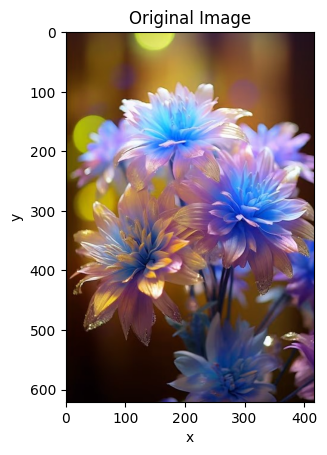

In [ ]:
################## TEST CASE 1: Flowers ##################################

############# 1. INSERT IMAGE #############
#Read in image
#HOWTO: cv2.imread('image file path')
image = cv2.imread('H:\\CODING\\PROJECT_IST\\flower.jpg')

#View in plot 3D image
plt.imshow(image) #Print plot in matlab of image against x and y dimensions
plt.xlabel("x") #Identified label names for the x dimension
plt.ylabel("y") #Identified label names for the y dimension
plt.title("Original Image")
plt.show() #ensure plot shows up clearly

############# 2. PROCESS IMAGE from 3D RGB image to 2D Array #############
#Process Image: PROCESS_IMAGE Function
#Wherein it'll be (huge number, 3), aka (each row is a pixel, RGBA channeL)
model = process_imageinto2D(image) #Process image into the 2D model we will use to analyze
print("Processed 2D Model Shape:", model.shape)

print(model[:5]) #Print the first few rows for check


############## 3. CALCULATE K MEANS ALGORITHM ######################################

# Start timer
start_time = time.time()

############## 3A. Initalize KMeans ######################################
#Initalize KMeans calculation that we will work with
#Utilizes __init__ function
kmeans = KMeansClustering(k=6) #Initialize a kmeans setup with X defined number of clusters

############## 3B. Run KMeans Algorithm on image ##########################
#With the Kmeans setup / AKA kmeans object created, find:
#2. Find Labels based on the image dataset in 2D
#KMeans.fit(kmeans object, model of dataset to use)
#model is your data array

#Call labels using the KMEANS INSTANCE of the KMeansClustering class you just created
labels = kmeans.fit(model) #RESULT: Give every data point a label


############## 3C. Turn it "back" to the original shape ##########################

#Create new segmented image where each pixel is replaced by the centroid color
#Reshape this array into a matrix that has this image
centroids = kmeans.centroids

print("Labels: ", labels)
print("Centroids: ", centroids)

segmented_image = centroids[labels]
segmented_image = segmented_image.reshape(image.shape) #reshape to original image shape

# End timer
end_time = time.time()
processing_time = end_time - start_time

# PRINT processing time
print(f'Processing Time: {processing_time:.2f} seconds')

############# PRINT segmented image #####################

plt.subplot(1, 2, 2)
plt.imshow(segmented_image.astype(np.uint8)) #convert to uinttype
plt.title("K-Means Segmented Image")
plt.xlabel("x") #Identified label names for the x dimension
plt.ylabel("y") #Identified label names for the y dimension
plt.show()



Raw Image: (408, 612, 3)


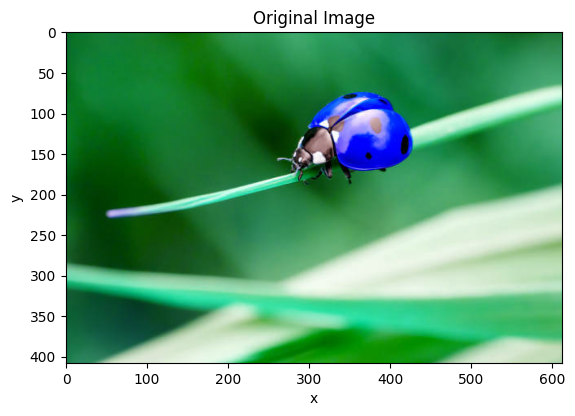

In [ ]:
################################# TEST CASE 2: Ladybug Image #########################################################


#################### 1. INSERT & DISPLAY IMAGE FOR SEGMENTATION ######################################################
image = cv2.imread('H:\\CODING\\PROJECT_IST\\ladybug.jpg') #Read in image HOWTO: cv2.imread('image file path')
#print("Raw Image:", image.shape) #Print Image Dimensions for check

#View original image
plt.imshow(image) #Print plot in matlab of image against x and y dimensions
plt.xlabel("x") #Identified label names for the x dimension
plt.ylabel("y") #Identified label names for the y dimension
plt.title("Original Image")
plt.show() #ensure plot shows up clearly

################### 2. PROCESS IMAGE from 3D RGB image to 2D Array: PROCESS IMAGE FUNCTION CALL #######################
model = process_imageinto2D(image) #Process image into the 2D array for analysis (large number = where each row is a pixel, RGBA channel=3)
print("Processed 2D Model Shape:", model.shape) #Print 2D array image for viewing
print(model[:5]) #Print the first few rows for check

############## 3. Initalize & Fit KMeans with k Clusters: KMEANS CLUSTERING FUNCTION CALL(S) ##########################
# Start timer
start_time = time.time()

#Initalize KMeans calculation that we will work with
kmeans = KMeansClustering(k=6) #Initialize a kmeans setup with X defined number of clusters
labels = kmeans.fit(model) #Call KMeansClustering fit model: Obtain labels for data points to assign to segmented image's pixels later
'''
#With the Kmeans setup / AKA kmeans object created, find:
#2. Find Labels based on the image dataset in 2D
#KMeans.fit(kmeans object, model of dataset to use)
#model is your data array
#RESULT: Give every data point a label
'''

################### 3C. Segmented Image: Resize and Identify Pixels by Color ###########################################
#Create new segmented image where each pixel is replaced by the centroid color
centroids = kmeans.centroids #Obtain final centroids calculated for this image via KMeansClustering fit method

print("Labels: ", labels) #Print for check
print("Centroids: ", centroids) #Print for check

segmented_image = centroids[labels] #Replace segmented image's pixels with centroid colors
segmented_image = segmented_image.reshape(image.shape) #Reshape segmented image to original image dimensions for equal comparison

# End timer
end_time = time.time()
processing_time = end_time - start_time

# PRINT processing time
print(f'Processing Time: {processing_time:.2f} seconds')

###################################### 6. PRINT segmented image ######################################################
plt.subplot(1, 2, 2)
plt.imshow(segmented_image.astype(np.uint8)) #convert to uinttype
plt.title("K-Means Segmented Image")
plt.xlabel("x") #Identified label names for the x dimension
plt.ylabel("y") #Identified label names for the y dimension
plt.show()



In [ ]:

'''
#Original image
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Original Image")
plt.axis("off")


#Segmented Image
plt.subplot(1, 2, 2)
plt.imshow(segmented_image)
plt.title("K-Means Segmented Image")
plt.axis("off")

plt.show()



'''